In [1]:
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit= 's')
users['creation_time'] = pd.to_datetime(users['creation_time'])

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [4]:
engage = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1', parse_dates=['time_stamp'])

In [5]:
engage.head(10)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [6]:
engage['week'] = engage['time_stamp'].dt.strftime('%Y-%U')
engage.head()

,time_stamp,user_id,visited,week
0,2014-04-22 03:53:30,1,1,2014-16
1,2013-11-15 03:45:04,2,1,2013-45
2,2013-11-29 03:45:04,2,1,2013-47
3,2013-12-09 03:45:04,2,1,2013-49
4,2013-12-25 03:45:04,2,1,2013-51


In [7]:
engage_week = engage.groupby(['user_id', 'week']).size().reset_index().rename(columns={0:'count'})
engage_week.head()

,user_id,week,count
0,1,2014-16,1
1,2,2013-45,1
2,2,2013-47,1
3,2,2013-49,1
4,2,2013-51,1


In [8]:
adopted_user = engage_week[engage_week['count'] >= 3].user_id.unique()

In [9]:
users['adopted'] = (users['object_id'].isin(adopted_user)).astype(int)

In [10]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [26]:
len_1 = len((users[users['adopted']== 1]).index)/len(users)
print('Precentage of adopted users {:2.2%}'.format(len_1))

Precentage of adopted users 11.93%


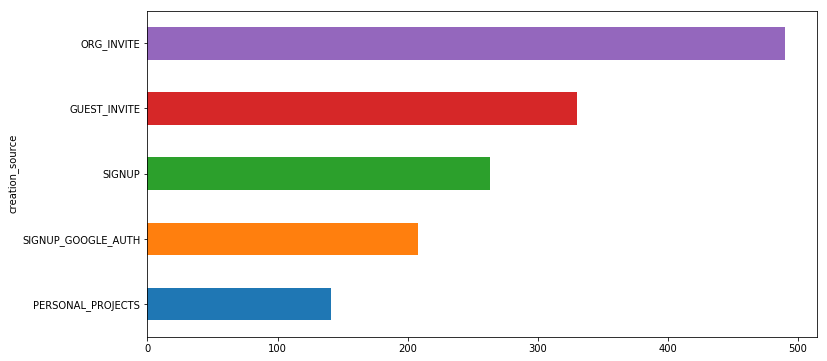

In [11]:
users[users['adopted'] == 1].groupby('creation_source')['adopted'].size().sort_values(0).plot(kind='barh', figsize = (12,6))

Text(0.5,1,'Non adoptable users')

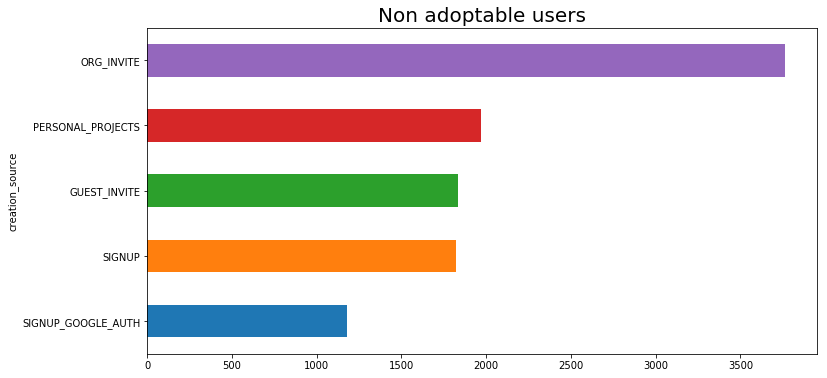

In [12]:
non_engaged = pd.DataFrame({'creation_source':users['creation_source'].iloc[users[users['adopted'] == 0].index],\
                           'adopted':users[users['adopted'] == 0].index})
non_engaged.groupby('creation_source')['adopted'].size().sort_values(0).plot(kind='barh', figsize = (12,6))
plt.title('Non adoptable users', fontsize = 20)

In [13]:
len_1 = users[users['adopted']== 1].invited_by_user_id.notnull().sum()/len(users[users['adopted']== 1])
len_2 = users[users['adopted']== 0].invited_by_user_id.notnull().sum()/len(users[users['adopted']== 0])
print('Adopted users invited by other users {:2.2%}'.format(len_1))
print('Not adopted users invited by other users {:2.2%}'.format(len_2))

Adopted users invited by other users 57.26%
Not adopted users invited by other users 52.96%


In [28]:
len_1 = len(users[(users['adopted']== 1) & (users['opted_in_to_mailing_list']== 1)].index)/len(users[users['adopted']== 1])
len_2 = len(users[(users['adopted']== 0) & (users['opted_in_to_mailing_list']== 1)].index)/len(users[users['adopted']== 0])
print('Adopted users opted in mailing list {:2.2%}'.format(len_1))
print('Not adopted users opted in mailing list {:2.2%}'.format(len_2))

Adopted users opted in mailing list 25.42%
Not adopted users opted in mailing list 24.89%


In [29]:
len_1 = len(users[(users['adopted']== 1) & (users['enabled_for_marketing_drip']== 1)].index)/len(users[users['adopted']== 1])
len_2 = len(users[(users['adopted']== 0) & (users['enabled_for_marketing_drip']== 1)].index)/len(users[users['adopted']== 0])
print('Adopted users opted in mailing list {:2.2%}'.format(len_1))
print('Not adopted users opted in mailing list {:2.2%}'.format(len_2))

Adopted users opted in mailing list 15.01%
Not adopted users opted in mailing list 14.92%


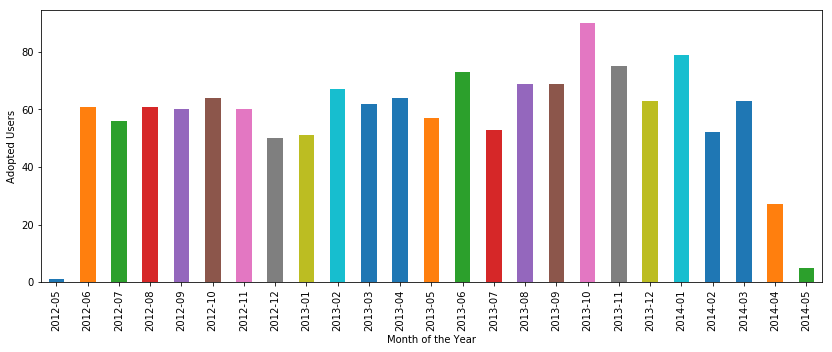

In [33]:
users['date'] = pd.to_datetime(users['creation_time'].dt.date)
users['month'] = users['date'].dt.strftime('%Y-%m')
users.groupby('month')['adopted'].sum().plot(kind='bar', figsize=(14,5))
plt.xlabel('Month of the Year')
plt.ylabel('Adopted Users')
plt.show()

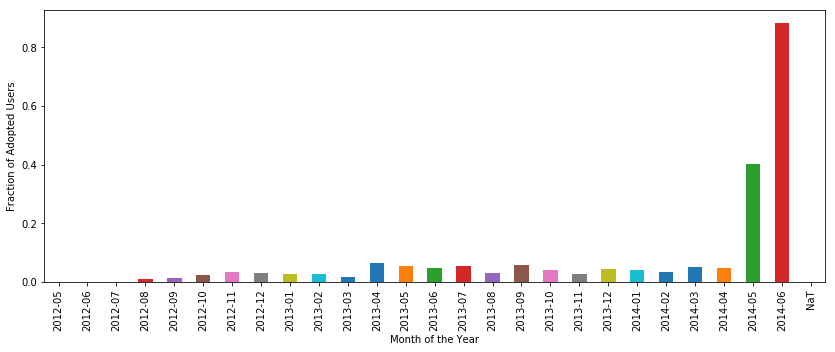

In [32]:
users['date'] = pd.to_datetime(users['last_session_creation_time'].dt.date)
users['month'] = users['date'].dt.strftime('%Y-%m')
users.groupby('month')['adopted'].mean().plot(kind='bar', figsize=(14,5))
plt.xlabel('Month of the Year')
plt.ylabel('Fraction of Adopted Users')
plt.show()

### Summary 
 In the entire dataset  only 11.93% were adopted users. Some plots were made to understand the behaviour of adopted users. Based on the creation source it seems that most people signed up because of organization invite. A vast number of Adopted users also signed up because of guest invite were as many non-adoptable users signed up due to personal projects. Also > 50 % of the users were invited by other users. Only 25% of users opted in mailing list and 15% for marketing drip showing that both adoptable and non-adoptable users shows a similar trend. A plot is made for the number of adopted use vs month. It seems that few months have done better than other months in particular October 2013. Also there is many adopted users in 2014-06. Since the sign-up is an on going process some users might still become sdoptable but the time series is truncated after a length of time.